In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sudipde25/mri-dataset-for-detection-and-analysis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mri-dataset-for-detection-and-analysis


In [ ]:
import os

#fetching NINS_Dataset
nins_path = "/kaggle/input/mri-dataset-for-detection-and-analysis/NINS_Dataset"
nins_files = os.listdir(nins_path)
#fetching the different folders in it
print(nins_files)
scans = os.path.join(nins_path, nins_files[0])



['NINS_Dataset']


In [ ]:
import os
import tensorflow as tf
import numpy as np

#resizing to 150*150 images
IMG_SIZE = (150, 150)

#names of all the folders that contain MRIs of brain tumor
tumor_folders = [
    'Brain tumor - Recurrenceremnant of previous lesion',
    'Brain tumor operated with ventricular hemorrhage',
    'Brain Tumor',
    'Brain Tumor (Hemangioblastoma  Pleomorphic xanthroastrocytoma  metastasis)',
    'Brain tumor (Dermoid cyst craniopharyngioma)',
    'small meningioma',
    'pituitary tumor',
    'Brain Tumor (Ependymoma)',
    'meningioma',
    'Brain tumor (Astrocytoma Ganglioglioma)',
    'Glioma',
    'Left Retro-orbital Haemangioma'
]
#the folder for normal MRIs
normal_folder = 'Normal'

image_paths = []
labels = []

#loading tumor images in image_paths and assigning label 1
for folder in tumor_folders:
    folder_path = os.path.join(scans, folder)
    if os.path.isdir(folder_path):
        for fname in os.listdir(folder_path):
            if fname.lower().endswith(".jpg"):
                image_paths.append(os.path.join(folder_path, fname))
                labels.append(1)

#number of MRIs with tumor
print(f"Total images collected: {len(image_paths)}")

#loading normal images in image_paths and assigning label 0
normal_path = os.path.join(scans, normal_folder)
for fname in os.listdir(normal_path):
    if fname.lower().endswith(".jpg"):
        image_paths.append(os.path.join(normal_path, fname))
        labels.append(0)

#number of total images
print(f"Total images collected: {len(image_paths)}")

#processing images to convert then to grey scale and resizing to 150*150
processed_images = []

for path in image_paths:
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.image.rgb_to_grayscale(image)
    image = tf.cast(image, tf.float32) / 255.0 #normalization
    processed_images.append(image)

#stacking images into a single tensor
image_tensor = tf.stack(processed_images)
label_tensor = tf.convert_to_tensor(labels, dtype=tf.int32)

#total number of images with final shape of tensor
print("Image tensor shape:", image_tensor.shape)
print("Label tensor shape:", label_tensor.shape)


Total images collected: 790
Total images collected: 2539
Image tensor shape: (2539, 150, 150, 1)
Label tensor shape: (2539,)


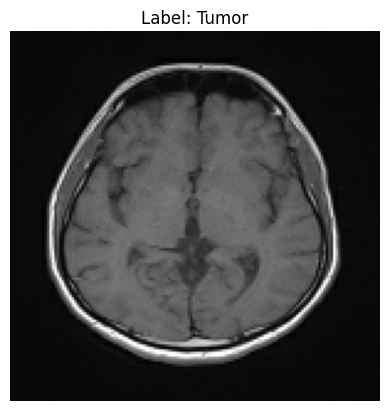

In [ ]:
import matplotlib.pyplot as plt

image = image_tensor[0].numpy().squeeze()
label = label_tensor[0].numpy()

if image.ndim == 2:
    plt.imshow(image, cmap='gray')
else:
    plt.imshow(image)

plt.title(f"Label: {'Tumor' if label == 1 else 'Normal'}")
plt.axis('off')
plt.show()


Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.6891 - loss: 0.6417
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6891 - loss: 0.6207
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6630 - loss: 0.6402
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6828 - loss: 0.6170
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7156 - loss: 0.5773
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7379 - loss: 0.5280
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7812 - loss: 0.4806
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8104 - loss: 0.3776
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8675 - loss: 0.2965
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8928 - loss: 0.2637

 Final Training Accuracy: 0.8929


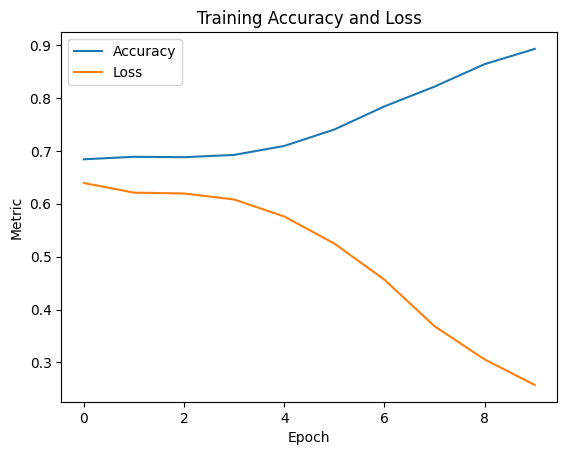

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_139 (Conv2D)             │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_134               │ (None, 75, 75, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_140 (Conv2D)             │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_135               │ (None, 37, 37, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_141 (Conv2D)             │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_136               │ (None, 18, 18, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_142 (Conv2D)             │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_137               │ (None, 9, 9, 128)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_34 (Flatten)            │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 128)            │     1,327,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,702,853 (17.94 MB)

 Trainable params: 1,567,617 (5.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,135,236 (11.96 MB)

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

images_np = image_tensor.numpy()
labels_np = label_tensor.numpy()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    images_np, labels_np, test_size=0.2, stratify=labels_np, random_state=30
)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset  = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(tf.data.AUTOTUNE)

import matplotlib.pyplot as plt

# Define a sequential CNN model for binary classification (tumor vs normal)
model = models.Sequential([
    # Input layer for grayscale images of shape 150x150x1
    layers.Input(shape=(150, 150, 1)),

    layers.Conv2D(32, (3, 3), activation='relu', padding = "same"),     # 32 filters, 3x3 kernel, ReLU activation
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding = "same"),     # 64 filters
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding = "same"),    # 128 filters
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding = "same"),    #128 filters
    layers.MaxPooling2D((2, 2)),

    # Flatten the 3D feature maps to 1D feature vector
    layers.Flatten(),

    # Fully connected dense layer
    layers.Dense(128, activation='relu'),             # 128 units with ReLU

    # Dropout layer to reduce overfitting
    layers.Dropout(0.5),

    # Output layer with sigmoid activation for binary classification
    layers.Dense(1, activation='sigmoid')
])



model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    image_tensor,
    label_tensor,
    epochs=10,
    batch_size=35,
)


final_acc = history.history['accuracy'][-1]
print(f"\n Final Training Accuracy: {final_acc:.4f}")

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel("Epoch")
plt.ylabel("Metric")
plt.title("Training Accuracy and Loss")
plt.legend()
plt.show()

model.summary()